In [11]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import collections

In [4]:
with rasterio.open('USA_994009_S2Hand_pred.tif') as src:
    tiff_data = src.read(1)

In [5]:
tiff_data.min(), tiff_data.max()

(0, 1)

In [6]:
np.unique(tiff_data)

array([0, 1], dtype=int16)

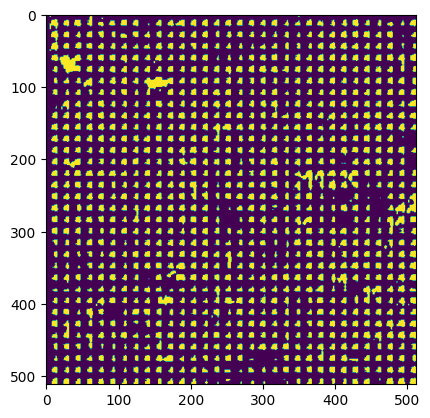

In [7]:
plt.imshow(tiff_data)

In [8]:
start = (1, 1)
end = (214, 315)

In [40]:
tiff_data[start], tiff_data[end]

(0, 0)

In [15]:
def bfs(grid: np.array, start: tuple[int, int], end: tuple[int, int]):
    height, width = grid.shape
    queue = collections.deque([[start]])
    seen = set([start])
    while queue:
        path = queue.popleft()
        x, y = path[-1]
        if (x, y) == end:
            return path
        for x2, y2 in ((x+1,y), (x-1,y), (x,y+1), (x,y-1)):
            if 0 <= x2 < width and 0 <= y2 < height and grid[y2][x2] != 1 and (x2, y2) not in seen:
                queue.append(path + [(x2, y2)])
                seen.add((x2, y2))

In [17]:
path = bfs(tiff_data, start, end)

In [32]:
mask = np.zeros_like(tiff_data)
for position in path:
    mask[position] = 1

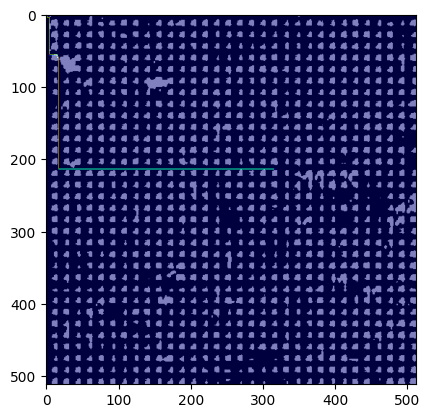

In [39]:
plt.imshow(tiff_data, cmap='gray')
plt.imshow(mask, cmap='jet', alpha=0.5)
plt.show()